In [69]:
#import 
import pandas as pd
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#see all files
files=glob.glob('/content/drive/MyDrive/neive/Youtube0*.csv')
files

['/content/drive/MyDrive/neive/Youtube01.csv',
 '/content/drive/MyDrive/neive/Youtube02.csv',
 '/content/drive/MyDrive/neive/Youtube03.csv',
 '/content/drive/MyDrive/neive/Youtube04.csv',
 '/content/drive/MyDrive/neive/Youtube05.csv']

In [4]:
#load all files and apeend 
all_df=[]
for i in files:
  all_df.append(pd.read_csv(i).drop(['COMMENT_ID','AUTHOR','DATE'],axis=1))

In [5]:
#concat all files in a list to 1 file
df=pd.concat(all_df,axis=0,ignore_index=True)
df.head(2)

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1


In [6]:
#observing class values
df['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

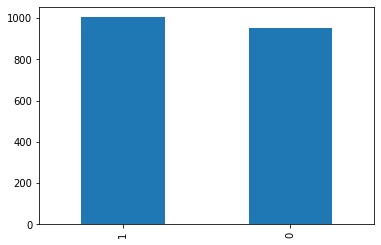

In [90]:
#observe frequency distribution
df['CLASS'].value_counts().plot(kind='bar')

In [36]:
#split (vertical splitting)
inputs=df['CONTENT']
target=df['CLASS']

In [45]:
# split (horizontal split)
x_train, x_test, y_train, y_test = train_test_split(inputs,target,
                                               test_size=0.2,
                                               random_state=365
                                               ,stratify=target
                                               )
                                              

In [46]:
#value count
y_train.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

In [47]:
#value count
y_test.value_counts(normalize=True)

1    0.514066
0    0.485934
Name: CLASS, dtype: float64

In [58]:
#vectorize our input data 
Vectorizer = CountVectorizer()

x_train_transf=Vectorizer.fit_transform(x_train)
x_test_transf=Vectorizer.transform(x_test)

In [59]:
#output observation
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
#shape
x_train_transf.shape

(1564, 3925)

In [61]:
x_test_transf.shape

(391, 3925)

In [71]:
#intializing algorithem and training 
clf=MultinomialNB(class_prior=np.array([0.6,0.4]))

clf.fit(x_train_transf,y_train.values)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [73]:
#parameters that can be used for hyperparameter tunning
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.6, 0.4]), 'fit_prior': True}

In [74]:
#predicting on  test data
y_test_pred= clf.predict(x_test_transf)

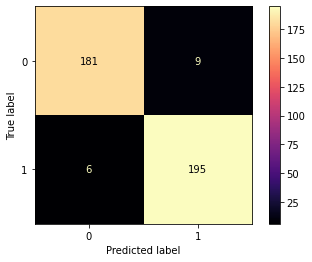

In [75]:
#ploting confusion metrics
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_test_pred,
    labels=clf.classes_,
    cmap='magma'
);

In [76]:
#observe precision,recall,fl and accuracy
print(classification_report(y_test,y_test_pred,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.95      0.96       190
        Spam       0.96      0.97      0.96       201

    accuracy                           0.96       391
   macro avg       0.96      0.96      0.96       391
weighted avg       0.96      0.96      0.96       391



In [87]:
#prediction on sample data
predict_mine=Vectorizer.transform(['mussie is amazing','u can win almost all in lottery just click hear'])

In [88]:
clf.predict(predict_mine)

array([0, 1])